In [16]:
# Import all libraries
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.optimizers import SGD,RMSprop,Adam
from keras.utils import np_utils
from keras.models import model_from_json
from keras.callbacks import ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # Disable warning message of tensorflow
import cv2
from numpy import *
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error
from skimage.measure import compare_ssim
import math

In [2]:
# Load X data
path1 = './Input/'
X_data = os.listdir(path1)
X_data = sorted(X_data)

X = np.array([np.array(cv2.resize(cv2.imread(path1 + img,0),(96,96), interpolation = cv2.INTER_CUBIC)).flatten() for img in X_data],'f')   
print(np.shape(X))

(800, 9216)


In [3]:
# Load Y data
path2 = './Label/'
Y_data = os.listdir(path2)
Y_data = sorted(Y_data)

Y = np.array([np.array(cv2.resize(cv2.imread(path2 + img2,0),(96,96))).flatten() for img2 in Y_data],'f') 
print(np.shape(Y))

(800, 9216)


In [4]:
# Split data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state = 4)

X_train = X_train.reshape(X_train.shape[0], 96, 96, 1)
X_test = X_test.reshape(X_test.shape[0], 96, 96, 1)
Y_train = Y_train.reshape(Y_train.shape[0], 96, 96, 1)
Y_test = Y_test.reshape(Y_test.shape[0], 96, 96, 1)

X_train = X_train.astype('int') 
X_test = X_test.astype('int')
Y_train = Y_train.astype('int') 
Y_test = Y_test.astype('int')

# Normalization of data 
# Data pixels are between 0 and 1
# X_train /= 255
# X_test /= 255
# Y_train /= 255
# Y_test /= 255

print(np.shape(X_train),np.shape(X_test),np.shape(Y_train),np.shape(Y_test))

(720, 96, 96, 1) (80, 96, 96, 1) (720, 96, 96, 1) (80, 96, 96, 1)


In [5]:
model = Sequential()
model.add(Conv2D(128, (9, 9), activation='relu', padding='same', kernel_initializer='glorot_uniform', use_bias=True, input_shape=(None, None, 1)))
model.add(Conv2D(64, (1, 1), activation='relu', padding='same', kernel_initializer='glorot_uniform', use_bias=True))
model.add(Conv2D(1, (5, 5), activation='linear', padding='same', kernel_initializer='glorot_uniform', use_bias=True))

opt = Adam(lr = 0.01)

model.compile(loss='mean_absolute_error', optimizer = opt, metrics=["accuracy"]) 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, None, None, 128)   10496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 64)    8256      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 1)     1601      
Total params: 20,353
Trainable params: 20,353
Non-trainable params: 0
_________________________________________________________________


In [6]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=10, factor=0.1, min_lr=0.00001)

results = model.fit(X_train, Y_train, batch_size=128, epochs=1000, validation_split = 0.1, shuffle = True, callbacks = [reduce_lr])


Train on 648 samples, validate on 72 samples
Epoch 1/1000
648/648 [==============================] - 7s 10ms/step - loss: 178.8841 - acc: 0.0058 - val_loss: 112.9294 - val_acc: 0.0052
Epoch 2/1000
648/648 [==============================] - 2s 2ms/step - loss: 70.0656 - acc: 0.0065 - val_loss: 33.2223 - val_acc: 0.0125
Epoch 3/1000
648/648 [==============================] - 2s 2ms/step - loss: 37.5142 - acc: 0.0115 - val_loss: 43.4918 - val_acc: 0.0129
Epoch 4/1000
648/648 [==============================] - 2s 2ms/step - loss: 32.3167 - acc: 0.0131 - val_loss: 25.1613 - val_acc: 0.0206
Epoch 5/1000
648/648 [==============================] - 2s 2ms/step - loss: 26.2867 - acc: 0.0174 - val_loss: 23.6950 - val_acc: 0.0188
Epoch 6/1000
648/648 [==============================] - 2s 2ms/step - loss: 23.1070 - acc: 0.0204 - val_loss: 22.9209 - val_acc: 0.0188
Epoch 7/1000
648/648 [==============================] - 2s 2ms/step - loss: 24.9381 - acc: 0.0193 - val_loss: 20.7529 - val_acc: 0.0222


Epoch 61/1000
648/648 [==============================] - 2s 2ms/step - loss: 6.7236 - acc: 0.0626 - val_loss: 6.5822 - val_acc: 0.0734
Epoch 62/1000
648/648 [==============================] - 2s 2ms/step - loss: 6.5983 - acc: 0.0670 - val_loss: 6.7321 - val_acc: 0.0670
Epoch 63/1000
648/648 [==============================] - 2s 2ms/step - loss: 6.5583 - acc: 0.0673 - val_loss: 6.5527 - val_acc: 0.0743
Epoch 64/1000
648/648 [==============================] - 2s 2ms/step - loss: 6.5008 - acc: 0.0690 - val_loss: 6.5835 - val_acc: 0.0731
Epoch 65/1000
648/648 [==============================] - 2s 2ms/step - loss: 6.4898 - acc: 0.0693 - val_loss: 6.5421 - val_acc: 0.0730
Epoch 66/1000
648/648 [==============================] - 2s 2ms/step - loss: 6.4643 - acc: 0.0703 - val_loss: 6.5352 - val_acc: 0.0732
Epoch 67/1000
648/648 [==============================] - 2s 2ms/step - loss: 6.4542 - acc: 0.0702 - val_loss: 6.5194 - val_acc: 0.0744
Epoch 68/1000
648/648 [==============================] 

648/648 [==============================] - 2s 2ms/step - loss: 5.9624 - acc: 0.0744 - val_loss: 6.0262 - val_acc: 0.0786
Epoch 122/1000
648/648 [==============================] - 2s 2ms/step - loss: 5.9577 - acc: 0.0743 - val_loss: 6.0237 - val_acc: 0.0785
Epoch 123/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.9566 - acc: 0.0744 - val_loss: 6.0585 - val_acc: 0.0770
Epoch 124/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.9756 - acc: 0.0739 - val_loss: 6.0319 - val_acc: 0.0780
Epoch 125/1000
648/648 [==============================] - 2s 2ms/step - loss: 5.9530 - acc: 0.0744 - val_loss: 6.0256 - val_acc: 0.0782
Epoch 126/1000
648/648 [==============================] - 2s 2ms/step - loss: 5.9524 - acc: 0.0744 - val_loss: 6.0172 - val_acc: 0.0785
Epoch 127/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.9409 - acc: 0.0746 - val_loss: 6.0148 - val_acc: 0.0783
Epoch 128/1000
648/648 [==============================] - 2s 2m

648/648 [==============================] - 2s 2ms/step - loss: 5.7144 - acc: 0.0763 - val_loss: 5.7646 - val_acc: 0.0803
Epoch 182/1000
648/648 [==============================] - 2s 2ms/step - loss: 5.7112 - acc: 0.0762 - val_loss: 5.7632 - val_acc: 0.0800
Epoch 183/1000
648/648 [==============================] - 2s 2ms/step - loss: 5.7084 - acc: 0.0764 - val_loss: 5.7578 - val_acc: 0.0801
Epoch 184/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.7047 - acc: 0.0764 - val_loss: 5.7538 - val_acc: 0.0801
Epoch 185/1000
648/648 [==============================] - 2s 2ms/step - loss: 5.7014 - acc: 0.0762 - val_loss: 5.7526 - val_acc: 0.0800
Epoch 186/1000
648/648 [==============================] - 2s 2ms/step - loss: 5.6983 - acc: 0.0765 - val_loss: 5.7487 - val_acc: 0.0800
Epoch 187/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.6950 - acc: 0.0763 - val_loss: 5.7438 - val_acc: 0.0803
Epoch 188/1000
648/648 [==============================] - 2s 2m

648/648 [==============================] - 2s 3ms/step - loss: 5.5494 - acc: 0.0778 - val_loss: 5.6034 - val_acc: 0.0816
Epoch 242/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.5538 - acc: 0.0775 - val_loss: 5.6085 - val_acc: 0.0811
Epoch 243/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.5602 - acc: 0.0774 - val_loss: 5.5890 - val_acc: 0.0821
Epoch 244/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.5519 - acc: 0.0776 - val_loss: 5.5914 - val_acc: 0.0819
Epoch 245/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.5449 - acc: 0.0776 - val_loss: 5.6619 - val_acc: 0.0789
Epoch 246/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.5687 - acc: 0.0771 - val_loss: 5.5881 - val_acc: 0.0814
Epoch 247/1000
648/648 [==============================] - 2s 2ms/step - loss: 5.5533 - acc: 0.0777 - val_loss: 5.6225 - val_acc: 0.0804
Epoch 248/1000
648/648 [==============================] - 2s 3m

648/648 [==============================] - 2s 3ms/step - loss: 5.4445 - acc: 0.0787 - val_loss: 5.4821 - val_acc: 0.0821
Epoch 302/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.4439 - acc: 0.0786 - val_loss: 5.4804 - val_acc: 0.0830
Epoch 303/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.4434 - acc: 0.0787 - val_loss: 5.4790 - val_acc: 0.0824
Epoch 304/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.4416 - acc: 0.0786 - val_loss: 5.4818 - val_acc: 0.0818
Epoch 305/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.4392 - acc: 0.0788 - val_loss: 5.4796 - val_acc: 0.0828
Epoch 306/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.4400 - acc: 0.0788 - val_loss: 5.4792 - val_acc: 0.0829
Epoch 307/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.4404 - acc: 0.0787 - val_loss: 5.4724 - val_acc: 0.0824
Epoch 308/1000
648/648 [==============================] - 2s 3m

648/648 [==============================] - 2s 3ms/step - loss: 5.3946 - acc: 0.0778 - val_loss: 5.3844 - val_acc: 0.0834
Epoch 362/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3798 - acc: 0.0784 - val_loss: 5.4053 - val_acc: 0.0826
Epoch 363/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3651 - acc: 0.0790 - val_loss: 5.4158 - val_acc: 0.0821
Epoch 364/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3668 - acc: 0.0787 - val_loss: 5.3803 - val_acc: 0.0844
Epoch 365/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3624 - acc: 0.0791 - val_loss: 5.4028 - val_acc: 0.0843
Epoch 366/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3764 - acc: 0.0788 - val_loss: 5.3966 - val_acc: 0.0847
Epoch 367/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3763 - acc: 0.0787 - val_loss: 5.4188 - val_acc: 0.0838
Epoch 368/1000
648/648 [==============================] - 2s 3m

648/648 [==============================] - 2s 2ms/step - loss: 5.3439 - acc: 0.0794 - val_loss: 5.3691 - val_acc: 0.0841
Epoch 422/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3435 - acc: 0.0795 - val_loss: 5.3674 - val_acc: 0.0845
Epoch 423/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3436 - acc: 0.0796 - val_loss: 5.3682 - val_acc: 0.0844
Epoch 424/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3431 - acc: 0.0795 - val_loss: 5.3673 - val_acc: 0.0847
Epoch 425/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3431 - acc: 0.0794 - val_loss: 5.3674 - val_acc: 0.0846
Epoch 426/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3431 - acc: 0.0795 - val_loss: 5.3673 - val_acc: 0.0847
Epoch 427/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3429 - acc: 0.0795 - val_loss: 5.3675 - val_acc: 0.0845
Epoch 428/1000
648/648 [==============================] - 2s 3m

648/648 [==============================] - 2s 3ms/step - loss: 5.3388 - acc: 0.0794 - val_loss: 5.3631 - val_acc: 0.0844
Epoch 482/1000
648/648 [==============================] - 2s 2ms/step - loss: 5.3391 - acc: 0.0795 - val_loss: 5.3636 - val_acc: 0.0843
Epoch 483/1000
648/648 [==============================] - 2s 2ms/step - loss: 5.3396 - acc: 0.0796 - val_loss: 5.3632 - val_acc: 0.0847
Epoch 484/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3412 - acc: 0.0793 - val_loss: 5.3666 - val_acc: 0.0841
Epoch 485/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3397 - acc: 0.0795 - val_loss: 5.3620 - val_acc: 0.0847
Epoch 486/1000
648/648 [==============================] - 2s 2ms/step - loss: 5.3388 - acc: 0.0796 - val_loss: 5.3634 - val_acc: 0.0843
Epoch 487/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3386 - acc: 0.0795 - val_loss: 5.3615 - val_acc: 0.0846
Epoch 488/1000
648/648 [==============================] - 2s 3m

648/648 [==============================] - 2s 3ms/step - loss: 5.3337 - acc: 0.0795 - val_loss: 5.3581 - val_acc: 0.0845
Epoch 542/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3346 - acc: 0.0797 - val_loss: 5.3570 - val_acc: 0.0848
Epoch 543/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3341 - acc: 0.0797 - val_loss: 5.3593 - val_acc: 0.0844
Epoch 544/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3336 - acc: 0.0797 - val_loss: 5.3558 - val_acc: 0.0848
Epoch 545/1000
648/648 [==============================] - 2s 2ms/step - loss: 5.3343 - acc: 0.0795 - val_loss: 5.3558 - val_acc: 0.0848
Epoch 546/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3347 - acc: 0.0792 - val_loss: 5.3577 - val_acc: 0.0844
Epoch 547/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3331 - acc: 0.0798 - val_loss: 5.3555 - val_acc: 0.0846
Epoch 548/1000
648/648 [==============================] - 2s 3m

648/648 [==============================] - 2s 3ms/step - loss: 5.3302 - acc: 0.0796 - val_loss: 5.3529 - val_acc: 0.0845
Epoch 602/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3292 - acc: 0.0797 - val_loss: 5.3503 - val_acc: 0.0849
Epoch 603/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3286 - acc: 0.0795 - val_loss: 5.3511 - val_acc: 0.0846
Epoch 604/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3288 - acc: 0.0797 - val_loss: 5.3583 - val_acc: 0.0842
Epoch 605/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3325 - acc: 0.0796 - val_loss: 5.3532 - val_acc: 0.0848
Epoch 606/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3311 - acc: 0.0797 - val_loss: 5.3499 - val_acc: 0.0848
Epoch 607/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3301 - acc: 0.0795 - val_loss: 5.3542 - val_acc: 0.0844
Epoch 608/1000
648/648 [==============================] - 2s 3m

648/648 [==============================] - 2s 3ms/step - loss: 5.3240 - acc: 0.0798 - val_loss: 5.3449 - val_acc: 0.0849
Epoch 662/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3241 - acc: 0.0798 - val_loss: 5.3468 - val_acc: 0.0846
Epoch 663/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3239 - acc: 0.0798 - val_loss: 5.3468 - val_acc: 0.0845
Epoch 664/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3240 - acc: 0.0797 - val_loss: 5.3444 - val_acc: 0.0847
Epoch 665/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3236 - acc: 0.0797 - val_loss: 5.3455 - val_acc: 0.0849
Epoch 666/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3248 - acc: 0.0795 - val_loss: 5.3447 - val_acc: 0.0847
Epoch 667/1000
648/648 [==============================] - 2s 2ms/step - loss: 5.3238 - acc: 0.0795 - val_loss: 5.3476 - val_acc: 0.0844
Epoch 668/1000
648/648 [==============================] - 2s 2m

648/648 [==============================] - 2s 2ms/step - loss: 5.3188 - acc: 0.0798 - val_loss: 5.3391 - val_acc: 0.0850
Epoch 722/1000
648/648 [==============================] - 2s 2ms/step - loss: 5.3199 - acc: 0.0797 - val_loss: 5.3387 - val_acc: 0.0845
Epoch 723/1000
648/648 [==============================] - 2s 2ms/step - loss: 5.3202 - acc: 0.0799 - val_loss: 5.3426 - val_acc: 0.0844
Epoch 724/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3195 - acc: 0.0796 - val_loss: 5.3430 - val_acc: 0.0845
Epoch 725/1000
648/648 [==============================] - 2s 2ms/step - loss: 5.3191 - acc: 0.0798 - val_loss: 5.3387 - val_acc: 0.0847
Epoch 726/1000
648/648 [==============================] - 2s 2ms/step - loss: 5.3185 - acc: 0.0798 - val_loss: 5.3389 - val_acc: 0.0850
Epoch 727/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3190 - acc: 0.0798 - val_loss: 5.3382 - val_acc: 0.0847
Epoch 728/1000
648/648 [==============================] - 2s 3m

648/648 [==============================] - 2s 2ms/step - loss: 5.3139 - acc: 0.0798 - val_loss: 5.3336 - val_acc: 0.0848
Epoch 782/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3139 - acc: 0.0797 - val_loss: 5.3338 - val_acc: 0.0848
Epoch 783/1000
648/648 [==============================] - 2s 2ms/step - loss: 5.3137 - acc: 0.0798 - val_loss: 5.3333 - val_acc: 0.0850
Epoch 784/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3145 - acc: 0.0798 - val_loss: 5.3391 - val_acc: 0.0846
Epoch 785/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3163 - acc: 0.0798 - val_loss: 5.3338 - val_acc: 0.0847
Epoch 786/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3141 - acc: 0.0796 - val_loss: 5.3333 - val_acc: 0.0850
Epoch 787/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3136 - acc: 0.0798 - val_loss: 5.3329 - val_acc: 0.0848
Epoch 788/1000
648/648 [==============================] - 2s 3m

648/648 [==============================] - 2s 3ms/step - loss: 5.3121 - acc: 0.0799 - val_loss: 5.3313 - val_acc: 0.0846
Epoch 842/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3119 - acc: 0.0798 - val_loss: 5.3325 - val_acc: 0.0846
Epoch 843/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3127 - acc: 0.0798 - val_loss: 5.3330 - val_acc: 0.0845
Epoch 844/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3119 - acc: 0.0798 - val_loss: 5.3312 - val_acc: 0.0846
Epoch 845/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3122 - acc: 0.0797 - val_loss: 5.3312 - val_acc: 0.0845
Epoch 846/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3119 - acc: 0.0797 - val_loss: 5.3319 - val_acc: 0.0848
Epoch 847/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3118 - acc: 0.0798 - val_loss: 5.3316 - val_acc: 0.0848
Epoch 848/1000
648/648 [==============================] - 2s 3m

648/648 [==============================] - 2s 3ms/step - loss: 5.3113 - acc: 0.0798 - val_loss: 5.3309 - val_acc: 0.0849
Epoch 902/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3113 - acc: 0.0798 - val_loss: 5.3311 - val_acc: 0.0849
Epoch 903/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3113 - acc: 0.0798 - val_loss: 5.3309 - val_acc: 0.0849
Epoch 904/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3113 - acc: 0.0798 - val_loss: 5.3309 - val_acc: 0.0848
Epoch 905/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3113 - acc: 0.0798 - val_loss: 5.3312 - val_acc: 0.0848
Epoch 906/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3114 - acc: 0.0797 - val_loss: 5.3318 - val_acc: 0.0846
Epoch 907/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3114 - acc: 0.0798 - val_loss: 5.3308 - val_acc: 0.0847
Epoch 908/1000
648/648 [==============================] - 2s 3m

648/648 [==============================] - 2s 3ms/step - loss: 5.3108 - acc: 0.0798 - val_loss: 5.3301 - val_acc: 0.0847
Epoch 962/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3107 - acc: 0.0798 - val_loss: 5.3305 - val_acc: 0.0848
Epoch 963/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3109 - acc: 0.0797 - val_loss: 5.3310 - val_acc: 0.0847
Epoch 964/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3107 - acc: 0.0798 - val_loss: 5.3301 - val_acc: 0.0847
Epoch 965/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3107 - acc: 0.0799 - val_loss: 5.3301 - val_acc: 0.0847
Epoch 966/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3107 - acc: 0.0798 - val_loss: 5.3303 - val_acc: 0.0848
Epoch 967/1000
648/648 [==============================] - 2s 3ms/step - loss: 5.3106 - acc: 0.0798 - val_loss: 5.3302 - val_acc: 0.0848
Epoch 968/1000
648/648 [==============================] - 2s 3m

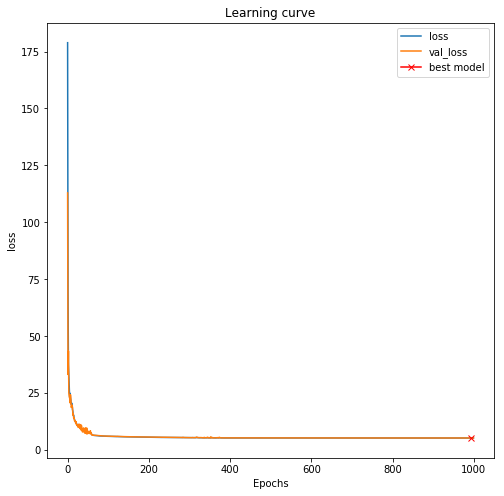

In [7]:
train_loss = results.history['loss']
val_loss = results.history['val_loss'] 
# train_acc = results.history['acc']
# val_acc = results.history['val_acc']

plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()

In [8]:
score = model.evaluate(X_test, Y_test, verbose=0) # accuracy check
print('Test loss:', score[0], 'Test accuracy:', score[1]) # Prints test accuracy

Test loss: 5.300447273254394 Test accuracy: 0.07802598625421524


In [9]:
# Save model and weights
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Serialize weights to H5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [10]:
# Load model and weights
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# Load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


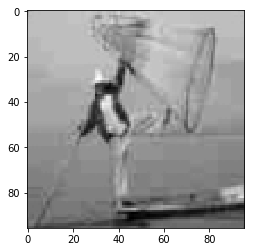

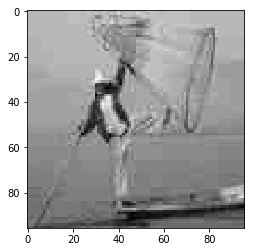

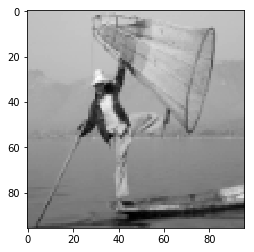

In [15]:
k = 10
test_img = X_test[k].reshape(1, 96, 96, 1)
pred_img = model.predict(test_img)
pred_img = pred_img.reshape(96,96)
pred_img = pred_img.astype('int') 
plt.imshow(pred_img, cmap='gray')
plt.figure()
plt.imshow(X_test[k].reshape(96,96), cmap='gray')
plt.figure()
plt.imshow(Y_test[k].reshape(96,96), cmap='gray')


In [18]:
# Compute MSE
print('MSE (Y, X): ', mean_squared_error(Y_test[k].reshape(96,96), X_test[k].reshape(96,96)))
print('MSE (Y , Predict): ', mean_squared_error(Y_test[k].reshape(96,96), pred_img))
print('MAE (Y, X): ', mean_absolute_error(Y_test[k].reshape(96,96), X_test[k].reshape(96,96)))
print('MAE (Y , Predict): ', mean_absolute_error(Y_test[k].reshape(96,96), pred_img))

(score1, diff1) = compare_ssim(Y_test[k].reshape(96,96), X_test[k].reshape(96,96),full=True)
print('SSIM (Y, X): ', score1)
(score2, diff2) = compare_ssim(Y_test[k].reshape(96,96), pred_img, full=True)
print('SSIM (Y, Predict): ', score2)

MSE (Y, X):  38.517252604166664
MSE (Y , Predict):  25.17697482638889
MAE (Y, X):  4.1865234375
MAE (Y , Predict):  3.466688368055556
SSIM (Y, X):  0.9999999999999968
SSIM (Y, Predict):  0.9999999999999978
